# <span style="color:darkblue"> Lecture 3 Exercises </span>



## Short Questions

<font size = "5">

1. What is a codebook?
2. How you define a missing value in Python?
2. What is chaining?

In [ ]:
# Write your answers here as comments

# 1. a codebook is a document that used to defines and explain variables in the dataset

# 2. 'none' or 'np.nan'
# and np.nan is for missing numerical data

# 3. using multiple methed sequentially in a statement. 



## Long Questions

<font size = "5">

Import the libraries "numpy" and "pandas"

In [1]:
# Write your own code

import numpy as np
import pandas as pd



<font size = "5">

(a) Replace values from intervals

<font size = "3">

- Import the dataset "data_raw/students.csv" to a new object "students"
- Use "pd.cut()" to assign the column "numericgrade" to a letter grade <br>
using the following table

<img src="figures/grading_scale.png" alt="drawing" width="600"/>


In [4]:
# Write your own code

students = pd.read_csv ("data_raw/students.csv")

bins = [0, 54, 59, 64, 69, 74, 79, 82, 86, 92, 100]
labels = ['F', 'D', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A']
students['lettergrade'] = pd.cut(students['numericgrade'],bins=bins, labels=labels)
print(students.head)



<bound method NDFrame.head of     studentid  numericgrade lettergrade
0           1            61          C-
1           2             0         NaN
2           3            14           F
3           4            57           D
4           5            72          C+
5           6            93           A
6           7            40           F
7           8            11           F
8           9             3           F
9          10            63          C-
10         11             7           F
11         12            46           F
12         13            75          B-
13         14            95           A
14         15            22           F
15         16            40           F
16         17            53           F
17         18            57           D
18         19            82           B
19         20            50           F
20         21             8           F
21         22            87          A-
22         23            82           B
23        

<font size = "5">

For questions (b)-(e) use "results.csv", <br>
a dataset on competitive car racing

Import the dataset "data/raw_results.csv" to <br>
 a new object "results"

<font size = "5">

(b) Check column types

<font size = "3">

- View the dataset
- Use the function "results.dtypes" to get the column types
- Search for the "results" table in "codebook/f1_codebook.pdf".
- Does the type of the "milliseconds" column agree with the codebook? <br>
i.e. is it an integer, float, or string/object?


HINT: See Lectures 13 and 14 for how to interpret the codebook


In [23]:
# Write your own code

results = pd.read_csv("data_raw/results.csv")
print(results.head())
print(results.dtypes)




   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3 

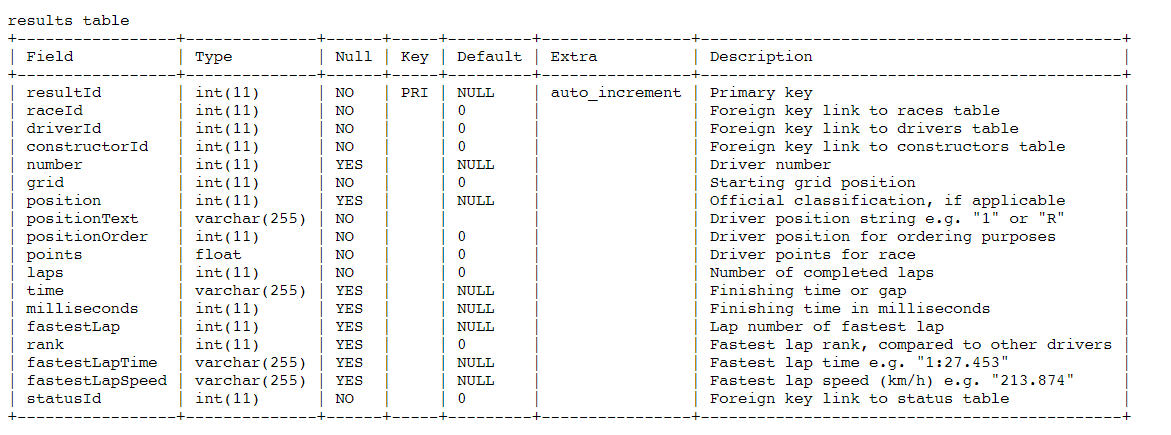

In [24]:
print(results["milliseconds"].dtypes)

object


No, the types are different. 

<font size = "5">

(c) Clean a column

<font size = "3">

- Import the dataset "data_raw/results.csv" to a new object "results"
- Our goal is to replace any string values in the column "milliseconds" <br>
to missing values (NaNs) and covert to numeric
- To do so, go to Lecture 13 and follow the setups under the headings
    - "Extract list of non-numeric values"
    - "Replace certain values"
    - "Convert column to numeric"

HINT: substitute "milliseconds" instead of "alt", <br>
and the dataset "results" instead of "circuits" 


In [25]:
results['milliseconds'] = results['milliseconds'].astype(str)
subset = results.query("milliseconds.str.isnumeric() == False")
list_unique = pd.unique(subset["milliseconds"])
print(list_unique)  

['\\N']


In [30]:
list_old = ['\\N']
list_new = [1]

# This command replaces the values of the "alt" column
results["milliseconds"] = results["milliseconds"].replace(list_old, list_new)

In [31]:
results["milliseconds"].dtypes

dtype('O')

In [33]:
results["milliseconds_numerical"] = pd.to_numeric(results["milliseconds"])
results["milliseconds_numerical"].mean()

1709182.8365325078

<font size = "5">

(d) Groupby + Aggregate

<font size = "3">

- Compute the mean and standard deviation of "laps", <br>
grouping by "constructorId". Store the new dataset <br>
as "results_agg"
- Sort the aggregate dataset in decending <br>
order of mean laps using ".sort_values()"

HINT: See Lecture 14 <br>


In [49]:
# Write your own code

results_agg = (results.groupby('constructorId')
                       .agg(mean_laps = ('laps', 'mean'),
                            sd_laps = ('laps', 'std'))
                       .sort_values(by='mean_laps', ascending=False))

print(results_agg)


                mean_laps    sd_laps
constructorId                       
149            198.500000   2.121320
112            197.000000   4.242641
109            184.285714  32.912583
119            178.666667  36.950417
108            163.764706  63.148168
...                   ...        ...
93               0.000000        NaN
61               0.000000   0.000000
137              0.000000        NaN
91               0.000000        NaN
74               0.000000   0.000000

[210 rows x 2 columns]


<font size = "5" >

(e) Query + Groupby + Aggregate

<font size = "3">

- Use ".query()" to subset observations with <br>
'race_id >= 200'
- Compute the mean and standard deviation of "laps", <br>
grouping by "constructorId". Store the new dataset <br>
as "results_agg"

Hint: See Lecture 11 (to refresh ".query()") and <br>
Lecture 14 for how to combine it with ".groupby()"

In [50]:
# Write your own code

results_agg = (results.query("raceId >= 200")
                      .groupby("constructorId")
                      .agg(mean_laps = ('laps', 'mean'),
                           sd_laps = ('laps', 'std'),
                           count_obs = ('laps', 'size'))) 

results_agg



,mean_laps,sd_laps,count_obs
constructorId,,,
1,50.093510,23.147774,1433
3,51.349621,21.064902,1187
4,46.396450,22.565290,507
5,51.787879,18.281774,396
6,50.305798,25.953854,1949
...,...,...,...
209,52.282051,19.522147,78
210,51.434028,19.915741,288
211,54.684211,17.680279,76



<font size = "5">

(f) Replace the values of a column

<font size = "3">

- Import the "data_raw/constructor_standings.csv" file
- Replace the values "E" with 11 in the column "positionText"
- Create a new column "positionNumeric" that converts <br>
the modified "positionText" column from string to numeric <br>
using ```pd.to_numeric()```



In [51]:
# Write your own code

constructor_standings = pd.read_csv('data_raw/constructor_standings.csv')  

# Replace 
constructor_standings['positionText'] = constructor_standings['positionText'].replace('E', '11')

# Convert from string to numeric
constructor_standings['positionNumeric'] = pd.to_numeric(constructor_standings['positionText'])

print(constructor_standings.head())




   constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  positionNumeric  
0            1     1                1  
1            3     0                3  
2            2     0                2  
3            4     0                4  
4            5     0                5  


<font size = "5">

(g) Recode a numeric colum

<font size = "3">

- Import the "data_raw/races.csv" file
- Recode the "year" column into a new column "year_brackets" <br>
with the following categories

$\qquad$ ``` ["1950-1970","1971-1990","1991-2005", "2006-2020", "2020-onwards"] ```

$\qquad$ HINT: Use the "pd.cut()" command. 

In [52]:
races = pd.read_csv('data_raw/races.csv')  

# Define bins and labels
bins = [1949, 1970, 1990, 2005, 2020, float('inf')]
labels = ["1950-1970", "1971-1990", "1991-2005", "2006-2020", "2020-onwards"]

races['year_brackets'] = pd.cut(races['year'], bins=bins, labels=labels, right=True, include_lowest=True)
print(races[['year', 'year_brackets']].head())





   year year_brackets
0  2009     2006-2020
1  2009     2006-2020
2  2009     2006-2020
3  2009     2006-2020
4  2009     2006-2020


<font size = "5">

(h) Aggregate and query

<font size = "3">

- Import the "data_raw/constructor_standings.csv" file
- Subset the observations for 'raceId == 10' using ```.query()```
- Obtain the sum of "points" by "constructorId" <br> 
(the team) using ``` .groupby().agg() ```
- Subset the teams with a sum of points $\ge 50$
- Store the results of all these operations in a dataframe <br>
```constructor_standings_agg ```

In [53]:
# Write your own code

subset = constructor_standings.query('raceId == 10')

constructor_standings_agg = (constructor_standings.query("raceId == 10")
                                                .groupby("constructorId")
                                                .agg(total_points = ('points', 'sum'))
                                                .reset_index())

constructor_standings_agg = constructor_standings_agg[constructor_standings_agg >= 50].reset_index()

print(constructor_standings_agg)




   index  constructorId  total_points
0      0            NaN           NaN
1      1            NaN           NaN
2      2            NaN           NaN
3      3            NaN           NaN
4      4            NaN           NaN
5      5            NaN           NaN
6      6            NaN           NaN
7      7            NaN          98.5
8      8            NaN           NaN
9      9            NaN         114.0


<font size = "5">

(i) Aggregate and sort

<font size = "3">

- Import the "data_raw/constructor_standings.csv" file
- Obtain the sum of "points" by "constructorId" <br> 
(the team) using ``` .groupby().agg() ```
- Sort the teams in descending order using of <br>
the sum of points using ``` .sort_values() ```

In [55]:
# Write your own code


constructor_points_sum = (constructor_standings.groupby('constructorId')['points']
                                                    .agg('sum')
                                                    .reset_index())

constructor_points_sum_sorted = constructor_points_sum.sort_values(by='points', ascending=False)

print(constructor_points_sum_sorted)





     constructorId   points
5                6  90204.0
109            131  71808.5
8                9  64986.5
0                1  57188.5
2                3  32093.5
..             ...      ...
89              93      0.0
88              92      0.0
86              90      0.0
85              89      0.0
87              91      0.0

[159 rows x 2 columns]


<font size = "5">

(j) Rename column

<font size = "3">

- Import the "data_raw/constructor_standings.csv" file
- Rename the column "wins" to "wins_constructor"

HINT: Create a dictionary and use ```.rename(columns = ...)``` <br>

In [56]:
# Write your own code

rename_dict = {'wins': 'wins_constructor'}
constructor_standings.rename(columns=rename_dict, inplace=True)
print(constructor_standings.head())




   constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins_constructor  positionNumeric  
0            1                 1                1  
1            3                 0                3  
2            2                 0                2  
3            4                 0                4  
4            5                 0                5  


<font size = "5">

(k) Merge dataset

<font size = "3">

- Import the "data_raw/constructor_standings.csv" and <br>
"data_raw/constructors.csv" files
- Create a new dataset with  ```pd.merge()``` using <br>
"constructor_standings" as the primary dataset, and <br>
"constructors" as the secondary dataset, merging on <br>
the column "constructorId"
- To get full points **ONLY** merge the "nationality" column <br>
from the secondary dataset (not all the columns)

HINT: Use ```[[...]]``` to extract a subset of columns <br>
from the secondary dataset before merging, including the <br>
"constructorId" column

In [57]:
# Write your own code

constructor_standings = pd.read_csv('data_raw/constructor_standings.csv')  
constructors = pd.read_csv('data_raw/constructors.csv')  

# Extract 
constructors_subset = constructors[['constructorId', 'nationality']]

# Merge 
merged_dataset = pd.merge(constructor_standings, constructors_subset, on='constructorId')

print(merged_dataset.head())






   constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       7      19              1    24.0         1   
2                      18      20              1    28.0         3   
3                      29      21              1    34.0         3   
4                      40      22              1    42.0         3   

  positionText  wins nationality  
0            1     1     British  
1            1     1     British  
2            3     1     British  
3            3     1     British  
4            3     1     British  
